# Yoga pose detection with computer vision

## Mediapipe pose detection

In [4]:
import cv2
import mediapipe as mp
import numpy as np
from matplotlib import pyplot as plt
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

### Static images

(-0.5, 639.5, 359.5, -0.5)

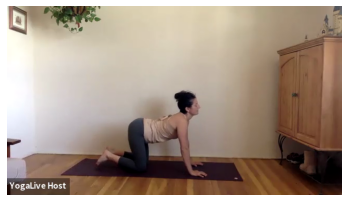

In [5]:
test_image=cv2.imread("DATA/training data/training frames/Bitilasana - cow pose/out1106.png")
test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(test_image)
plt.axis("off")

CPU times: user 678 ms, sys: 289 ms, total: 967 ms
Wall time: 598 ms


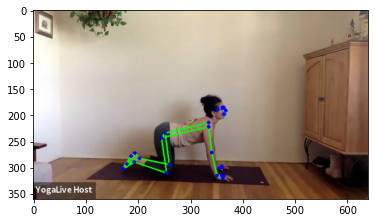

In [6]:
%%time
with mp_pose.Pose(
    static_image_mode=True, model_complexity=2, min_detection_confidence=0.5
) as pose:
    image_height, image_width, _ = test_image.shape
    results = pose.process(test_image)

    # Draw pose landmarks on the image.
    annotated_image = test_image.copy()
    mp_drawing.draw_landmarks(
        annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS
    )
    plt.imshow(annotated_image)

### Plotting in 3D

In [7]:
%matplotlib inline

In [8]:
X=np.array([m.x for m in results.pose_landmarks.landmark])
Y=np.array([m.y for m in results.pose_landmarks.landmark])
Z=np.array([m.z for m in results.pose_landmarks.landmark])

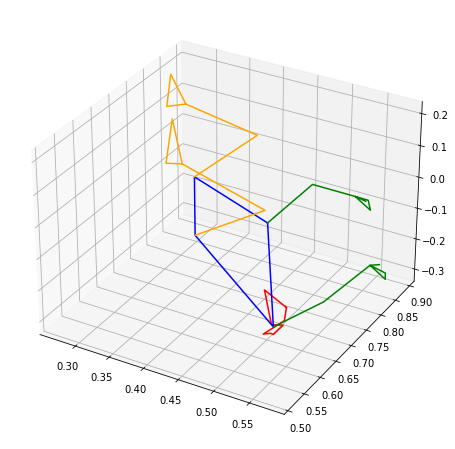

In [9]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(projection='3d')
head=[9,10,8,6,5,4,0,1,2,3,7,9]
ax.plot(X[head],Y[head],Z[head], color="r") # head
body=[11,12,24,23,11]
ax.plot(X[body],Y[body],Z[body], color="b") # body
leg_l=[24,26,28,32,30,28]
leg_r=[23,25,27,29,31,27]
ax.plot(X[leg_l],Y[leg_l],Z[leg_l], color="orange")
ax.plot(X[leg_r],Y[leg_r],Z[leg_r], color="orange")
arm_l=[12,14,16,18,20,16,22]
arm_r=[11,13,15,17,19,15,21]
ax.plot(X[arm_l],Y[arm_l],Z[arm_l], color="green")
ax.plot(X[arm_r],Y[arm_r],Z[arm_r], color="green")
plt.show()

In [15]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Scatter3d(
    x=X[body], y=Y[body], z=Z[body]
),color="blue")
fig.show()

TypeError: invalid Figure property: color
color
Bad property path:
color
^^^^^

In [11]:
import plotly.express as px
fig = px.line_3d(X[body], Y[body], Z[body], color="blue")
fig.show()

ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of [0] but received: blue

## Normalizing body position


## What is the data
lines

In [67]:
results.pose_landmarks

landmark {
  x: 0.5755260586738586
  y: 0.5320345759391785
  z: -0.12208478152751923
  visibility: 0.9999805688858032
}
landmark {
  x: 0.5695677399635315
  y: 0.5166510343551636
  z: -0.1095825657248497
  visibility: 0.999984860420227
}
landmark {
  x: 0.5679576396942139
  y: 0.5164777040481567
  z: -0.10959843546152115
  visibility: 0.999982476234436
}
landmark {
  x: 0.5666808485984802
  y: 0.516411304473877
  z: -0.10965937376022339
  visibility: 0.9999901056289673
}
landmark {
  x: 0.5687834024429321
  y: 0.517622709274292
  z: -0.14111775159835815
  visibility: 0.9999874830245972
}
landmark {
  x: 0.5667934417724609
  y: 0.5182034373283386
  z: -0.1410893052816391
  visibility: 0.9999831914901733
}
landmark {
  x: 0.5649049282073975
  y: 0.5184091329574585
  z: -0.14107629656791687
  visibility: 0.9999823570251465
}
landmark {
  x: 0.5528901219367981
  y: 0.5252702832221985
  z: -0.022930670529603958
  visibility: 0.9999855756759644
}
landmark {
  x: 0.5500767230987549
  y: 0.529

## Check processed dataset

NameError: name 'pd' is not defined